# Progetto Visualizzazione Scientifica
### Autori 
Simone Alessandro Casciaro 987303<br>
Michela Francesca Firrera 02022A

### Scaletta
- Introduzione
    - 1 slide su spiegazione di cos'è un GP --> 
        - Abbreviazione  Gran Premio
        - Durata  Intero weekend di gara (Venerdì, Sabato e Domenica).
        - Campionato di Formula 1  Molteplici GP.
        - Composizione  Prove Libere, Qualifiche e Gara.
        - Ogni Gran Premio viene corso in una pista diversa, quasi sempre di paesi diversi!
    - Chi ha vinto più GP? (Piloti e Costruttori)
    - Distribuzione delle vittorie e delle migliori squadre (Ferrari, McLaren, Mercedes, Williams, Red Bull)
- Com'è strutturato un GP?
    - Slide che mostra il format classico: FP1, FP2, FP3, Q1, Q2, Q3 e R
- Inizio Analisi GP (CoTA)
    - Studio delle FP1
    - Studio delle FP2
    - Studio delle FP3
        ...
- Introduzione format alternativo
    - Slide che mostra il format Sprint: FP1, Q1, Q2, Q3, SQ1, SQ2, SQ3, SR, R
    - Come cambia l'analisi di un GP nei format Sprint?
        ...
- Domande finali
    - Troveremo domande in corso d'opera alla quale rispondere con ulteriori grafici
- Conclusione

### Fonti
- Dataset http://ergast.com/mrd/
- Stile Grafici https://docs.fastf1.dev/plotting.html
- Telemetrie https://docs.fastf1.dev/core.html

# Inizio Analisi GP (CoTA)

### Apertura Sessioni

In [1]:
import fastf1 as f1

FP = f1.get_session(2023, 'Austin', 1) # Free Practice
Q = f1.get_session(2023, 'Austin', 2) # Qualifying
SQ = f1.get_session(2023, 'Austin', 3) # Sprint Shootout
SR = f1.get_session(2023, 'Austin', 4) # Sprint Race
R = f1.get_session(2023, 'Austin', 5) # Race

# Loading Sessions
FP.load()
Q.load()
#SQ.load()
#SR.load()
#R.load()

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: C:\Users\ASUS\AppData\Local\Temp\fastf1.
	Size: 331.17 MB
core           INFO 	Loading data for United States Grand Prix - Practice 1 [v3.1.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '10', '11', '14', '16', '18', '2', '20', '22', '23', '24', '27', '3', '31', '4', '44', '55',

### Import Librerie

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import fastf1.plotting as f1plt
import fastf1.utils as f1u

f1plt.setup_mpl()

plt.rc('figure', figsize=(15.0, 10.0))

### Track Map

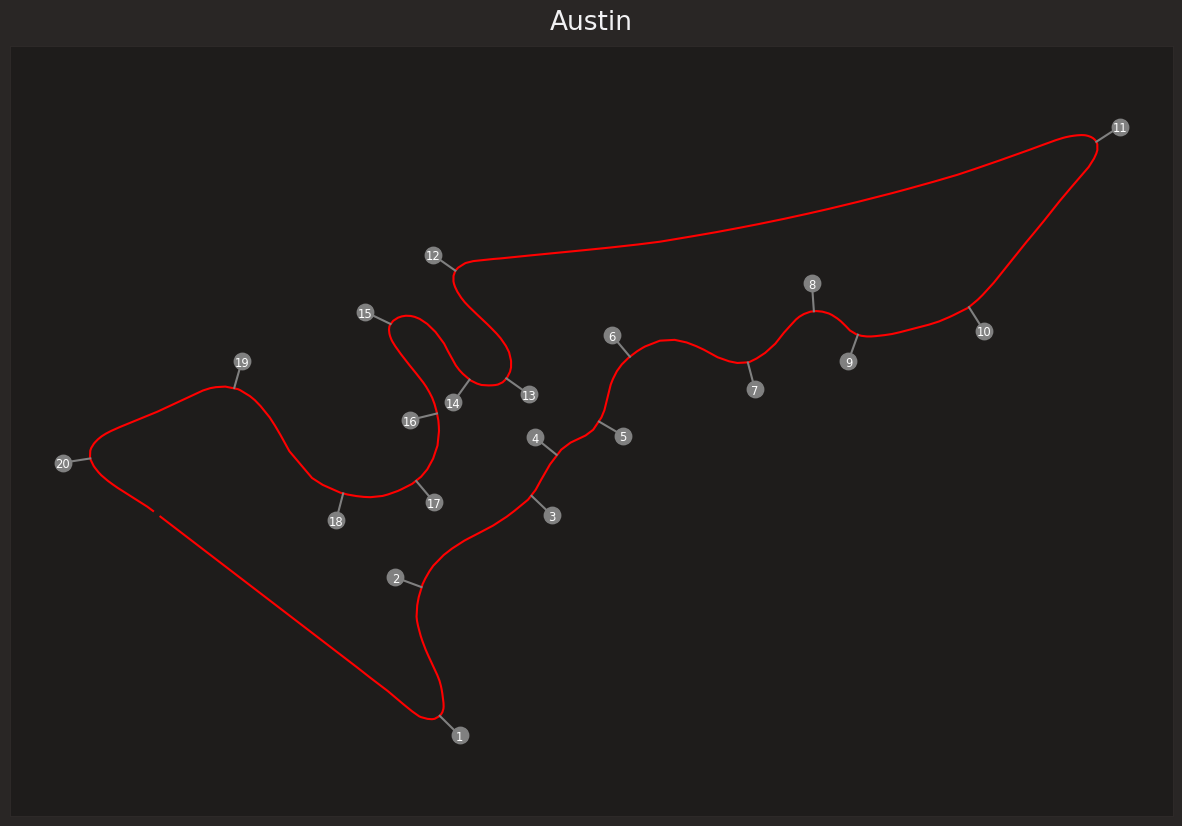

In [3]:
lap = Q.laps.pick_fastest()
pos = lap.get_pos_data()

circuit_info = Q.get_circuit_info()

# ---

def rotate(xy, *, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
    return np.matmul(xy, rot_mat)

# ---

# Get an array of shape [n, 2] where n is the number of points and the second
# axis is x and y.
track = pos.loc[:, ('X', 'Y')].to_numpy()

# Convert the rotation angle from degrees to radian.
track_angle = circuit_info.rotation / 180 * np.pi

# Rotate and plot the track map.
rotated_track = rotate(track, angle=track_angle)
plt.plot(rotated_track[:, 0], rotated_track[:, 1], color = 'red')

# ---

offset_vector = [500, 0]  # offset length is chosen arbitrarily to 'look good'

# Iterate over all corners.
for _, corner in circuit_info.corners.iterrows():
    # Create a string from corner number and letter
    txt = f"{corner['Number']}{corner['Letter']}"

    # Convert the angle from degrees to radian.
    offset_angle = corner['Angle'] / 180 * np.pi

    # Rotate the offset vector so that it points sideways from the track.
    offset_x, offset_y = rotate(offset_vector, angle=offset_angle)

    # Add the offset to the position of the corner
    text_x = corner['X'] + offset_x
    text_y = corner['Y'] + offset_y

    # Rotate the text position equivalently to the rest of the track map
    text_x, text_y = rotate([text_x, text_y], angle=track_angle)

    # Rotate the center of the corner equivalently to the rest of the track map
    track_x, track_y = rotate([corner['X'], corner['Y']], angle=track_angle)

    # Draw a circle next to the track.
    plt.scatter(text_x, text_y, color='grey', s=140)

    # Draw a line from the track to this circle.
    plt.plot([track_x, text_x], [track_y, text_y], color='grey')

    # Finally, print the corner number inside the circle.
    plt.text(text_x, text_y, txt,
             va='center_baseline', ha='center', size='small', color='white')
    
# ---

plt.title(Q.event['Location'])
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()

### Free Practice

C:\Users\ASUS\anaconda3\Lib\site-packages\fastf1\utils.py:86: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
C:\Users\ASUS\anaconda3\Lib\site-packages\fastf1\utils.py:86: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
C:\Users\ASUS\anaconda3\Lib\site-packages\fastf1\utils.py:86: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"


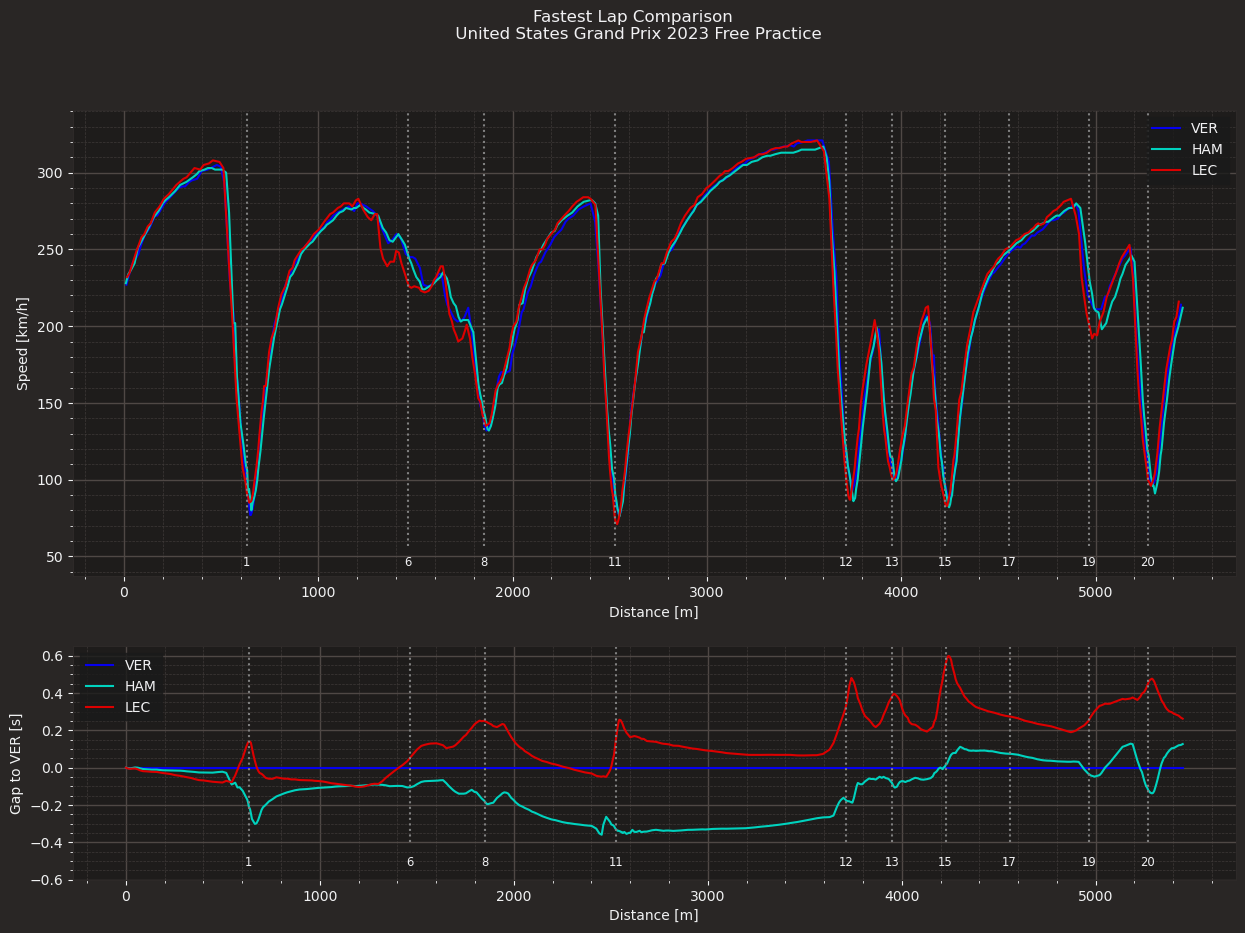

In [59]:
# Let's compare Verstappen (1:35.912), Hamilton (1:36.068) and Leclerc (1:36.193)

# Data for Plot 1
ver_lap = FP.laps.pick_driver('VER').pick_fastest()
ham_lap = FP.laps.pick_driver('HAM').pick_fastest()
lec_lap = FP.laps.pick_driver('LEC').pick_fastest()

# Get Telemetry from the laps
ver_tel = ver_lap.get_car_data().add_distance()
ham_tel = ham_lap.get_car_data().add_distance()
lec_tel = lec_lap.get_car_data().add_distance()

plot_ratios = [2, 1]
fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': plot_ratios})

# Plot 1
ax[0].plot(ver_tel['Distance'], ver_tel['Speed'], color = f1plt.driver_color('VER'), label = 'VER')
ax[0].plot(ham_tel['Distance'], ham_tel['Speed'], color = f1plt.driver_color('HAM'), label = 'HAM')
ax[0].plot(lec_tel['Distance'], lec_tel['Speed'], color = f1plt.driver_color('LEC'), label = 'LEC')
 
ax[0].set_xlabel('Distance [m]')
ax[0].set_ylabel('Speed [km/h]')

ax[0].legend()
plt.suptitle(f"Fastest Lap Comparison \n "
            f"{FP.event['EventName']} {FP.event.year} Free Practice")

selected_corners = [i-1 for i in (1,6,8,11,12,13,15,17,19,20)]
v_min = ver_tel['Speed'].min()
v_max = ver_tel['Speed'].max()
ax[0].vlines(x=circuit_info.corners['Distance'].loc[selected_corners], ymin=v_min-20, ymax=v_max+20,
          linestyles='dotted', colors='grey')
for _, corner in circuit_info.corners.iterrows():
    if corner['Number']-1 in selected_corners:
        txt = f"{corner['Number']}{corner['Letter']}"
        ax[0].text(corner['Distance'], v_min-30, txt,
                va='center_baseline', ha='center', size='small')
        ax[1].text(corner['Distance'], -.5, txt,
                va='center_baseline', ha='center', size='small')

ax[0].set_ylim([v_min - 40, v_max + 20])

# Data for Plot 2 and Plotting
delta_time_ham, ref_tel_ham, compare_tel_ham = f1u.delta_time(ver_lap, ham_lap)
delta_time_lec, ref_tel_lec, compare_tel_lec = f1u.delta_time(ver_lap, lec_lap)
delta_time_ver, ref_tel_ver, compare_tel_ver = f1u.delta_time(ver_lap, ver_lap)
ax[1].plot(ref_tel_ver['Distance'], delta_time_ver, color=f1plt.driver_color('VER'), label='VER')
ax[1].plot(ref_tel_ham['Distance'], delta_time_ham, color=f1plt.driver_color('HAM'), label='HAM')
ax[1].plot(ref_tel_ham['Distance'], delta_time_lec, color=f1plt.driver_color('LEC'), label='LEC')
ax[1].set(ylabel=f"Gap to VER [s]")
ax[1].set_xlabel('Distance [m]')
ax[1].legend()
ax[1].set_ylim([-.6,.65])
ax[1].vlines(x=circuit_info.corners['Distance'].loc[selected_corners], ymin=-.4, ymax=.65,
          linestyles='dotted', colors='grey')

plt.show()